Import Function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

Import Data

In [2]:
os.chdir('C:\\Users\\santa\\OneDrive\\Documents\\KMUTT-4\\Final_PJ\\Data')
df = pd.read_csv('USDTHB_N.csv')
df.head()

,Date,Value
0,03/21/2024,35.915
1,03/20/2024,36.091
2,03/19/2024,35.985
3,03/18/2024,35.890
4,03/15/2024,35.780


In [3]:
df.shape

(5796, 2)

In [4]:
df.isnull().sum()

Date     0
Value    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

Date      object
Value    float64
dtype: object

In [7]:
df.describe()

,Value
count,5796.000000
mean,34.561396
std,3.757668
min,28.560000
25%,31.630000
50%,33.440000
75%,36.052500
max,44.200000


Data Processing

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.set_index('Date',inplace = True)

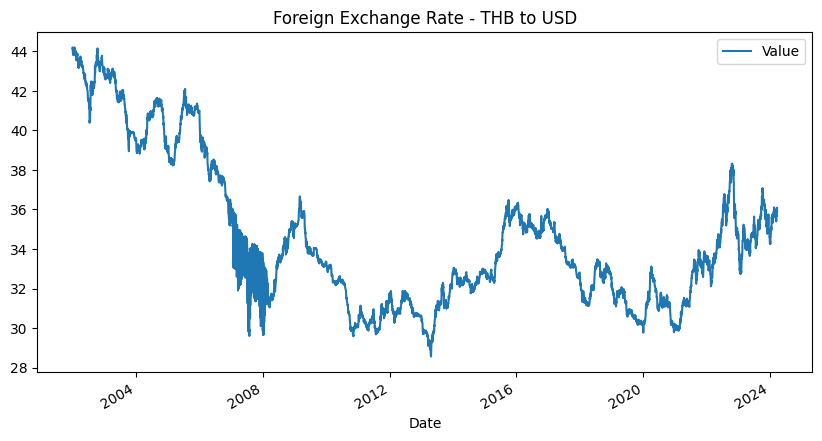

In [10]:
df.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate - THB to USD')
#plt.savefig('Foreign Exchange Rate - THB to USD.png')
plt.show()

In [11]:
df_week = df.resample('W').mean()
print('Count of The Weekly Data Frame : ',df_week.shape[0])
df_week.head()

Count of The Weekly Data Frame :  1160


,Value
Date,
2002-01-06,44.136667
2002-01-13,43.972000
2002-01-20,43.876000
2002-01-27,44.076000
2002-02-03,44.026000


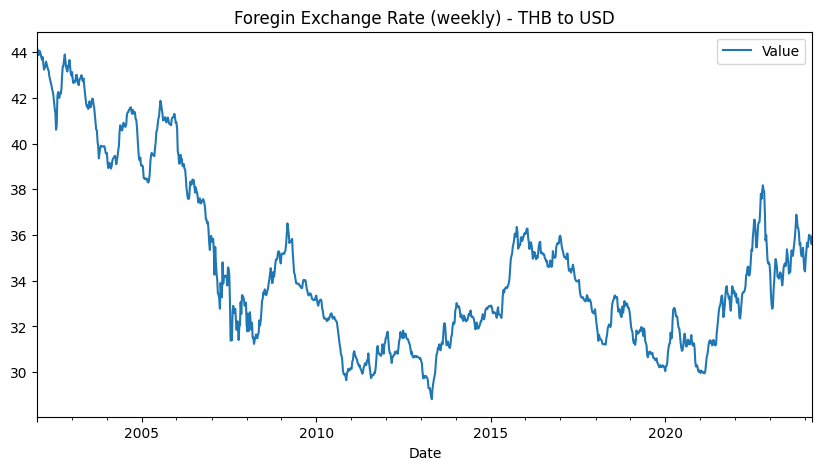

In [12]:
df_week.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (weekly) - THB to USD')
#plt.savefig('Foregin Exchange Rate (weekly) - THB to USD.png')
plt.show()

In [13]:
df_month = df.resample('M').mean()
print('Count of The Monthly Data Frame : ',df_month.shape[0])
df_month.head()

Count of The Monthly Data Frame :  267


,Value
Date,
2002-01-31,44.004545
2002-02-28,43.809500
2002-03-31,43.370000
2002-04-30,43.407273
2002-05-31,42.807826


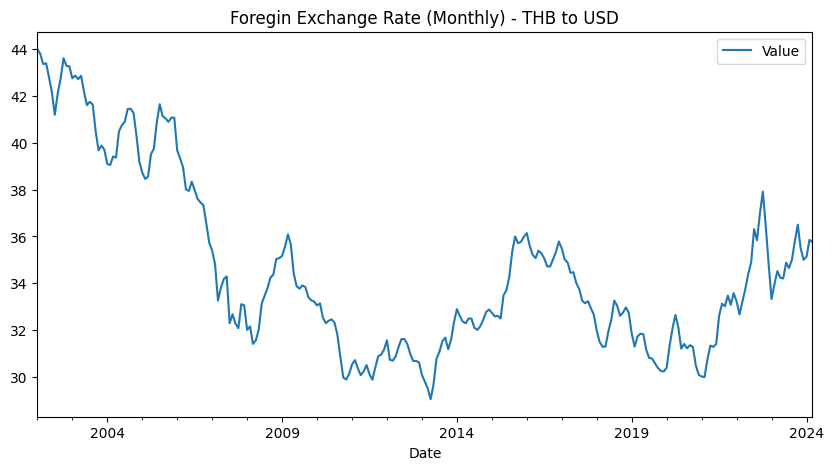

In [14]:
df_month.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Monthly) - THB to USD')
#lt.savefig('Foregin Exchange Rate (Monthly) - THB to USD')
plt.show()

In [15]:
df_year = df.resample('Y').mean()
print('Count of The Yearly Data Frame : ',df_year.shape[0])
df_year.head()

Count of The Yearly Data Frame :  23


,Value
Date,
2002-12-31,42.977923
2003-12-31,41.508686
2004-12-31,40.236854
2005-12-31,40.245931
2006-12-31,37.911931


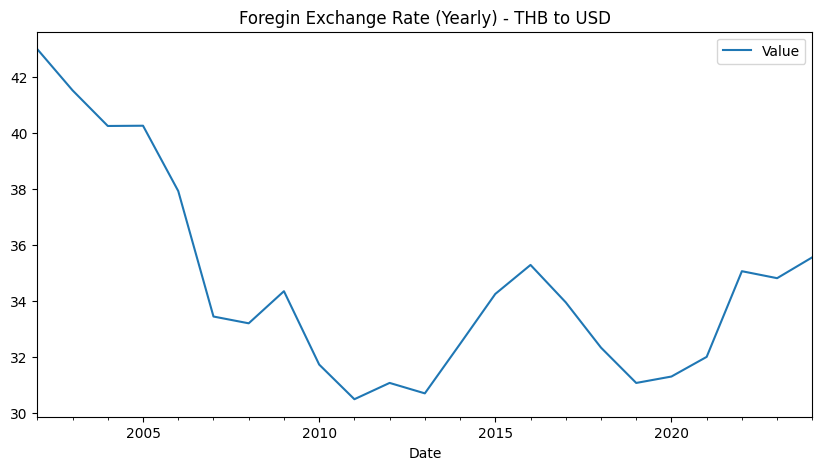

In [16]:
df_year.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Yearly) - THB to USD')
#plt.savefig('Foregin Exchange Rate (Yearly) - THB to USD.png')
plt.show()

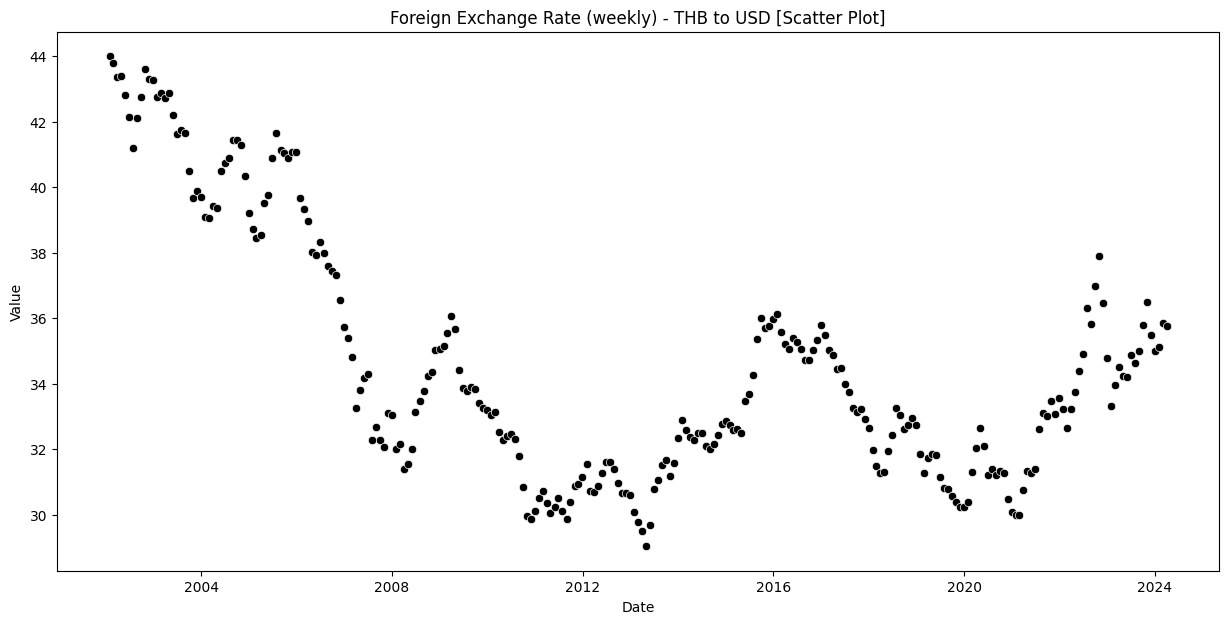

In [17]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = df_month.index , y = df_month.Value , color = 'black')
plt.title('Foreign Exchange Rate (weekly) - THB to USD [Scatter Plot]')
#plt.savefig('Foreign Exchange Rate (weekly) - THB to USD [Scatter Plot].png')
plt.show()

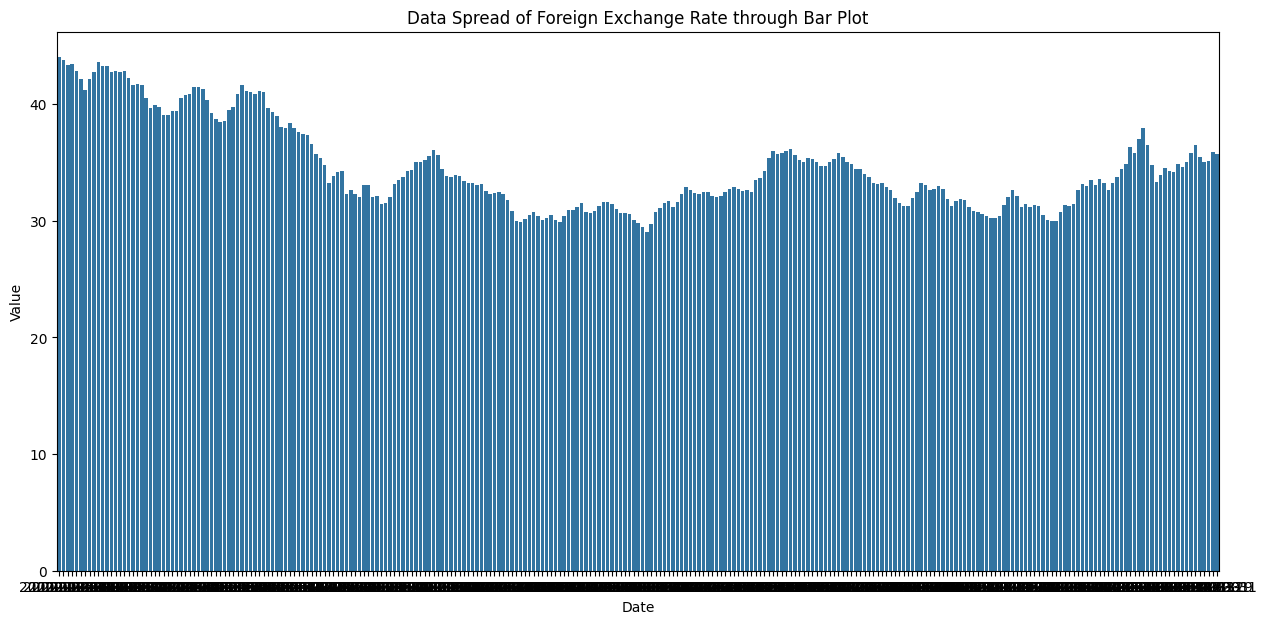

In [18]:
sns.barplot(data = df_month,x = df_month.index , y = df_month.Value)
plt.title('Data Spread of Foreign Exchange Rate through Bar Plot')
#plt.savefig('Data Spread of Foreign Exchange Rate through Bar Plot.png')
plt.show()

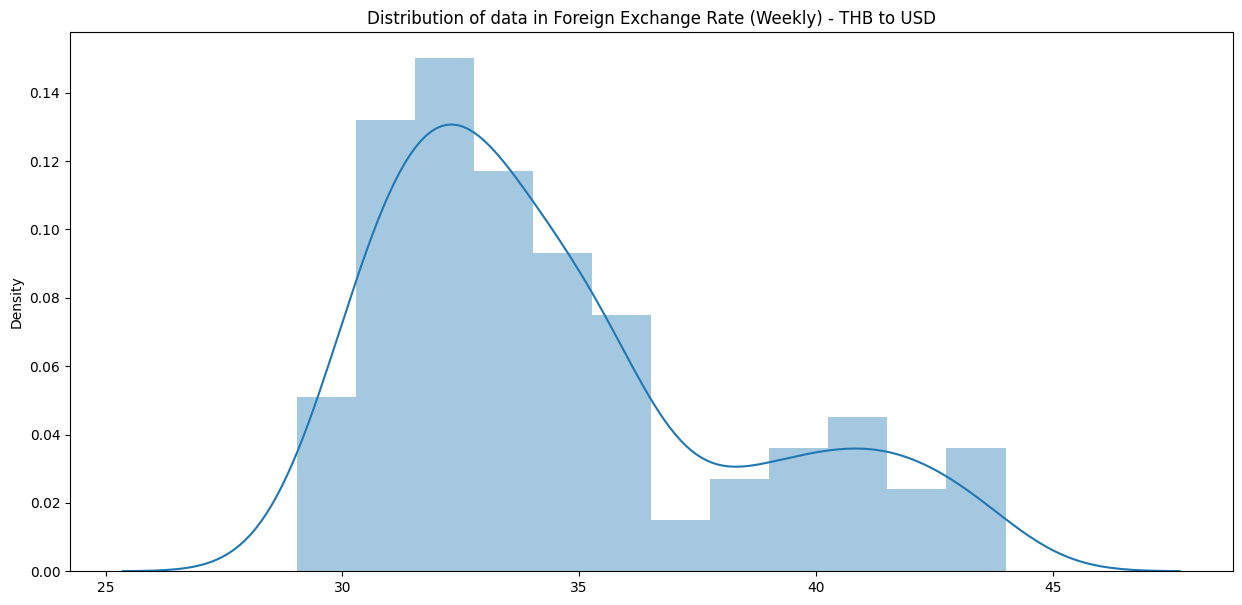

In [19]:
sns.distplot(df_month)
plt.title('Distribution of data in Foreign Exchange Rate (Weekly) - THB to USD')
#plt.savefig('Distribution of data in Foreign Exchange Rate (Weekly) - THB to USD.png')
plt.show()

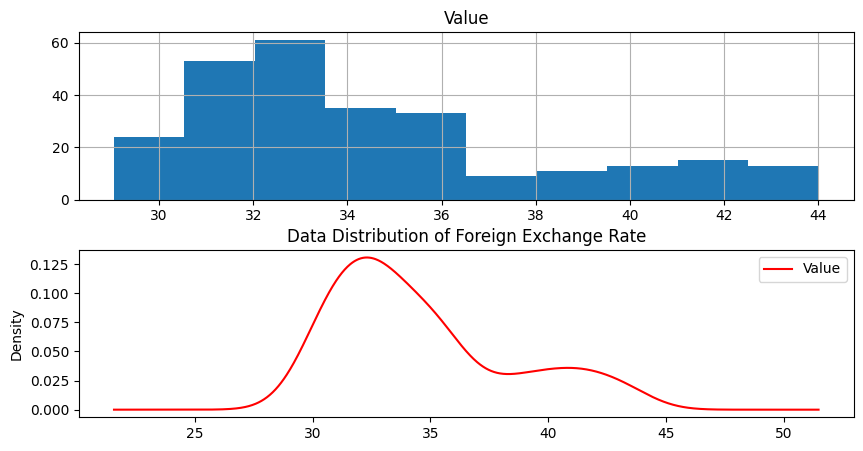

In [20]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
df_month.hist(ax = ax1)
df_month.plot(kind = 'kde' , ax = ax2,c = 'r')
plt.title('Data Distribution of Foreign Exchange Rate')
#plt.savefig('Data Distribution of Foreign Exchange Rate.png')
plt.show()

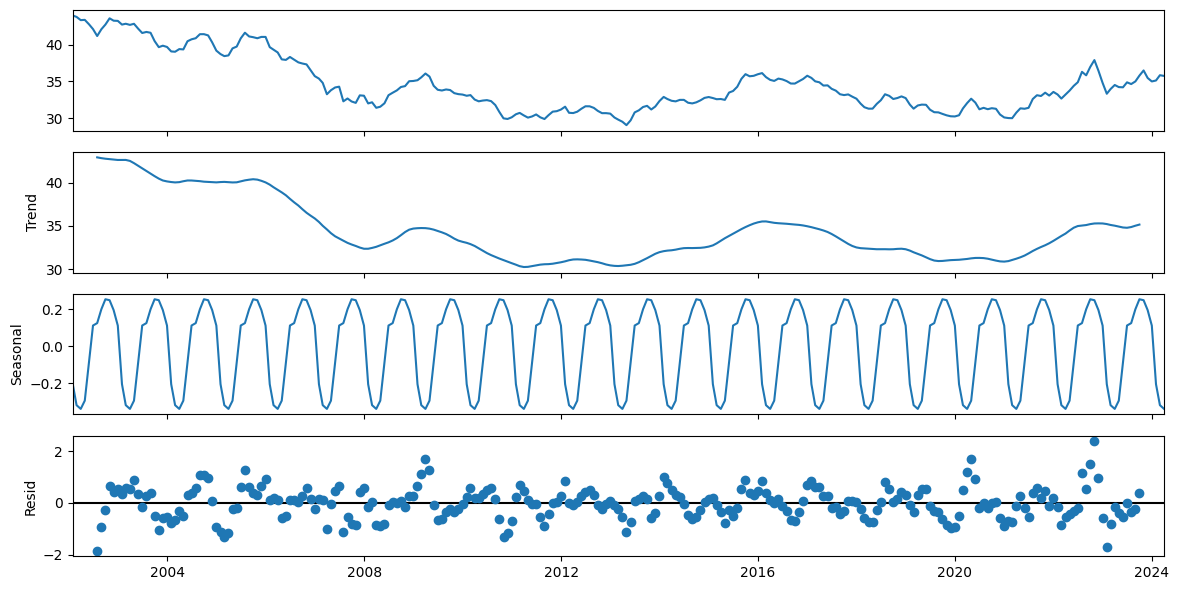

In [21]:
plt.rcParams['figure.figsize']=(12,6)
decomposition = seasonal_decompose(df_month , period = 12 , model = 'additive')
decomposition.plot()
#plt.savefig('Discription , trend , seasonal , residuals.png')
plt.show()

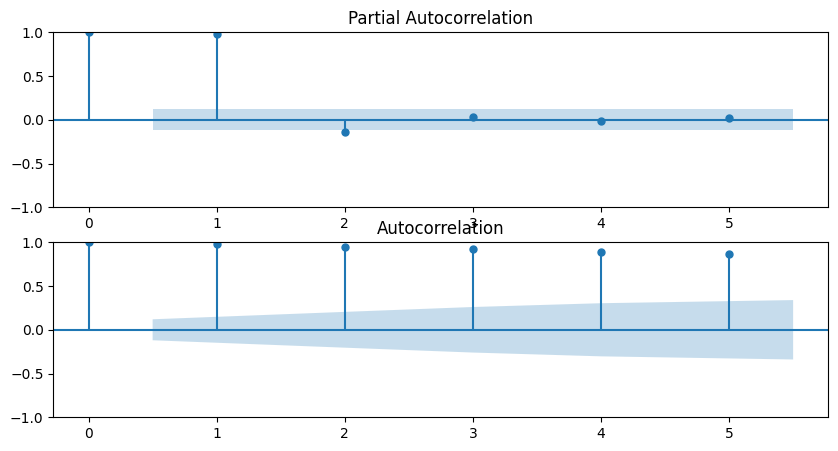

In [22]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = plot_pacf(df_month , lags = 5 , ax = ax1)
ax2 = plot_acf(df_month , lags = 5 , ax = ax2)
#plt.savefig('Partial Autocorrelation and Autocorrelation.png')
plt.show()

Data tranformation

In [23]:
def adf_check(time_series):
    result = adfuller(time_series , autolag = 'AIC')
    label = pd.Series(result[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        label['Critical Value (%s)'%key] = value
    print(label)
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary')
    else:
        print ('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

In [24]:
adf_check(df_month)

Test Statistic                  -2.443372
p-value                          0.129867
Number of Lags Used              2.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
Critical Value (10%)            -2.572638
dtype: float64
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


In [41]:
df1_month = df_month.diff().dropna()
print('Count of monthlyly First Difference',df1_month.shape[0])
df1_month.head()

Count of monthlyly First Difference 266


,Value
Date,
2002-02-28,-0.195045
2002-03-31,-0.439500
2002-04-30,0.037273
2002-05-31,-0.599447
2002-06-30,-0.657826


In [26]:
adf_check(df1_month)

Test Statistic                -1.066318e+01
p-value                        4.354129e-19
Number of Lags Used            1.000000e+00
Number of Observations Used    2.640000e+02
Critical Value (1%)           -3.455365e+00
Critical Value (5%)           -2.872551e+00
Critical Value (10%)          -2.572638e+00
dtype: float64
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary


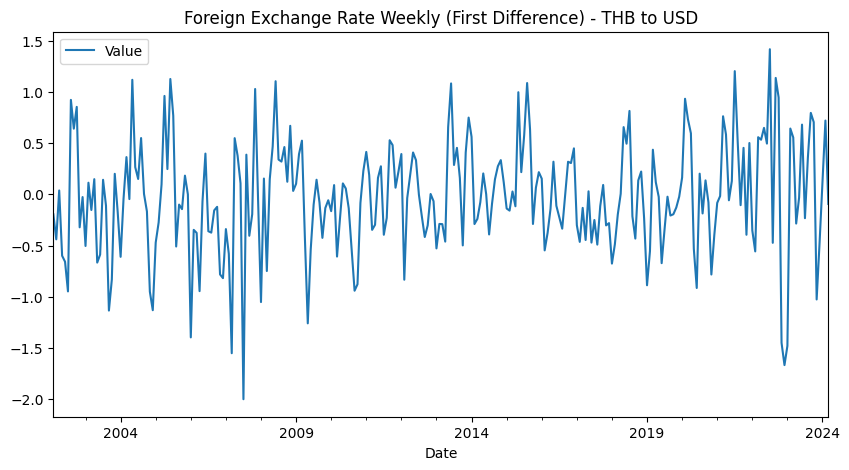

In [27]:
df1_month.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate Weekly (First Difference) - THB to USD')
#plt.savefig('Foreign Exchange Rate Weekly(First Difference) - THB to USD.png')
plt.show()

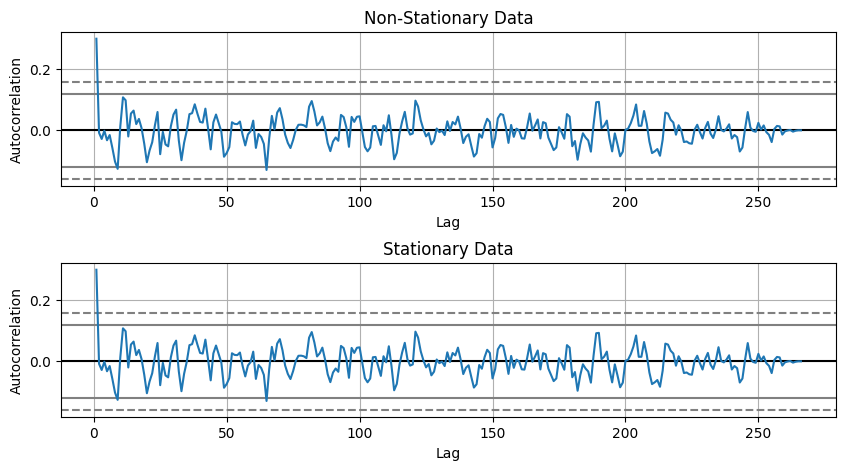

In [28]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df1_month , ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1_month , ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
#plt.savefig('Stationary data and Non-Stationary data.png')
plt.show()

Model Fitting

In [42]:
model = auto_arima(df_month , m = 12, d = 1 ,seasonal = False , max_order = 8 , test = 'adf' , trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=415.143, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=436.983, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=414.134, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=411.399, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=435.839, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=413.351, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=413.339, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=413.188, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=409.953, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=411.890, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=411.876, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=412.609, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=411.732, Time=0.19 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.606 seconds


In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  267
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -202.977
Date:                Sun, 24 Mar 2024   AIC                            409.953
Time:                        15:21:30   BIC                            417.120
Sample:                    01-31-2002   HQIC                           412.832
                         - 03-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3266      0.050      6.576      0.000       0.229       0.424
sigma2         0.2692      0.019     13.913      0.000       0.231       0.307
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                10.66
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.17
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
model = ARIMA(df_month , order = (0,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                  267
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -202.977
Date:                Sun, 24 Mar 2024   AIC                            409.953
Time:                        15:21:34   BIC                            417.120
Sample:                    01-31-2002   HQIC                           412.832
                         - 03-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3266      0.050      6.576      0.000       0.229       0.424
sigma2         0.2692      0.019     13.913      0.000       0.231       0.307
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                10.66
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.17
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

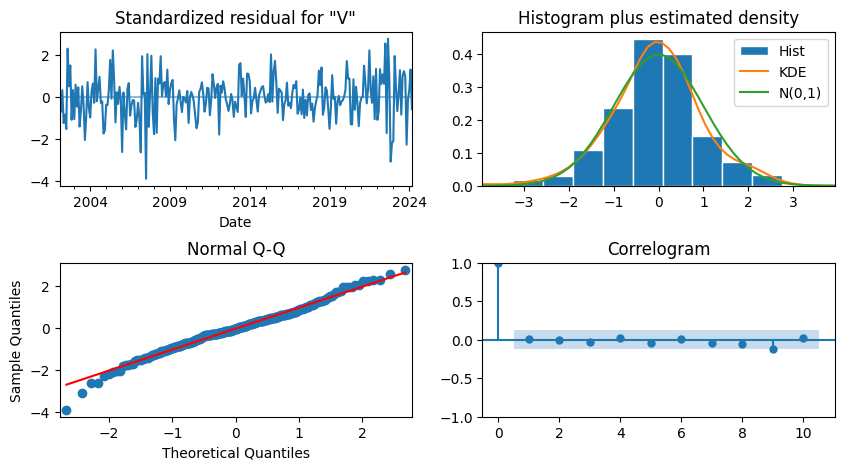

In [45]:
result.plot_diagnostics(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5)
#plt.savefig('Diagnostic plot of best model.png')
plt.show()

In [46]:
predictions = result.predict(typ = 'levels')

In [47]:
print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_month['Value'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_month['Value'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_month['Value'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_month['Value'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_month['Value'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 46.28 % 

Mean Squared Error :  7.520683218886425 

Mean Absolute Error :  0.5571019632377429 

Root Mean Squared Error :  2.7423864094774144 

Mean Absolute Percentage Error : 1.51 %


In [48]:
Final_data = pd.concat([df_month,df1_month,predictions],axis=1)
Final_data.columns = ['Foreign Exchange Rate (monthly)','Monthly First Difference','Predicted Exchange Rate']
#Final_data.to_csv('Foreign Exchange Rate with Prediction (THB To USD).csv')
Final_data.head()

,Foreign Exchange Rate (monthly),Monthly First Difference,Predicted Exchange Rate
Date,,,
2002-01-31,44.004545,NaN,0.000000
2002-02-28,43.809500,-0.195045,44.004549
2002-03-31,43.370000,-0.439500,43.751939
2002-04-30,43.407273,0.037273,43.246534
2002-05-31,42.807826,-0.599447,43.459710


Model Testing

In [49]:
size = int(len(df_month)*0.80)
train , test = df_month[0:size]['Value'] , df_month[size:(len(df_month))]['Value']
print('Counts of Train Data : ',train.shape[0])
print('Counts of Train Data : ',test.shape[0])

Counts of Train Data :  213
Counts of Train Data :  54


In [50]:
train_values = [x for x in train]
prediction = []
print('Printing Predictied vs Expected Values....')
print('\n')
for t in range(len(test)):
    model = ARIMA(train_values , order = (0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred_out = output[0]
    prediction.append(float(pred_out))
    test_in = test[t]
    train_values.append(test_in)
    print('Predicted = %f , Actual = %f' % (pred_out , test_in))

Printing Predictied vs Expected Values....


Predicted = 30.506989 , Actual = 30.379783
Predicted = 30.339360 , Actual = 30.250238
Predicted = 30.221891 , Actual = 30.226818
Predicted = 30.228385 , Actual = 30.390435
Predicted = 30.441992 , Actual = 31.322250
Predicted = 31.604082 , Actual = 32.052727
Predicted = 32.197451 , Actual = 32.647727
Predicted = 32.795013 , Actual = 32.115714
Predicted = 31.896694 , Actual = 31.201818
Predicted = 30.973650 , Actual = 31.403043
Predicted = 31.543891 , Actual = 31.216190
Predicted = 31.109853 , Actual = 31.351818
Predicted = 31.429960 , Actual = 31.272955
Predicted = 31.222325 , Actual = 30.490476
Predicted = 30.251861 , Actual = 30.090870
Predicted = 30.038386 , Actual = 30.007143
Predicted = 29.996896 , Actual = 29.990000
Predicted = 29.987738 , Actual = 30.751087
Predicted = 31.001524 , Actual = 31.334091
Predicted = 31.443499 , Actual = 31.275714
Predicted = 31.220077 , Actual = 31.405909
Predicted = 31.467405 , Actual = 32.607273
Predicted

In [52]:
print('Evaluation Result for Test data : ','\n')
print('R2 Score for Test data : {0:.2f} %'.format(100*r2_score(test,prediction)),'\n')
print('Mean Squared Error : ',mean_squared_error(test,prediction),'\n')
print('Mean Absolute Error : ',mean_absolute_error(test,prediction),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(test,prediction)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test,prediction)))

Evaluation Result for Test data :  

R2 Score for Test data : 90.64 % 

Mean Squared Error :  0.4155636210391755 

Mean Absolute Error :  0.5177040196061622 

Root Mean Squared Error :  0.6446422426735433 

Mean Absolute Percentage Error : 1.53 %


In [53]:
predictions_df = pd.Series(prediction, index = test.index)

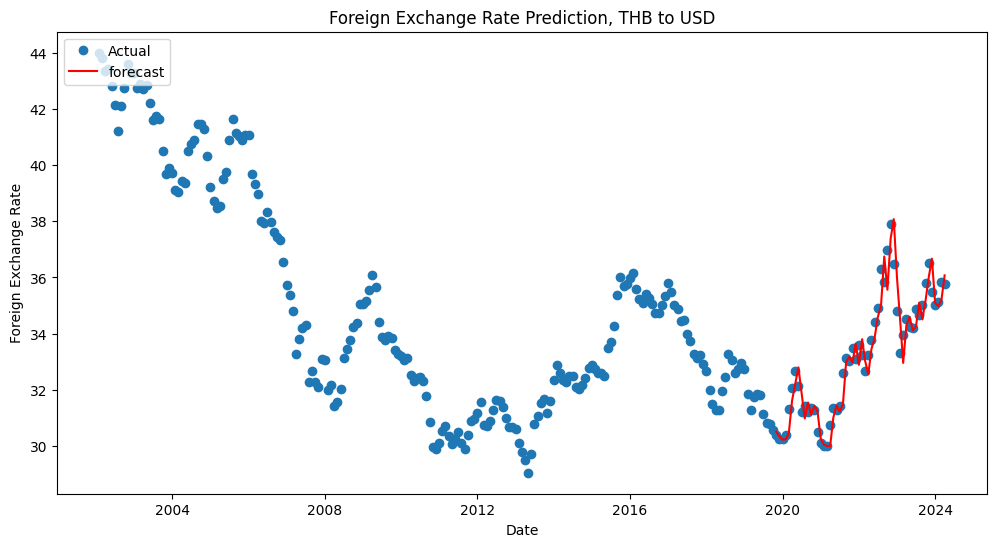

In [55]:
plt.rcParams['figure.figsize'] = (12,6)
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction, THB to USD', xlabel='Date', ylabel='Foreign Exchange Rate')
ax.plot(df_month, 'o', label='Actual')
ax.plot(predictions_df, 'r', label='forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')
#plt.savefig('Foreign Exchange Rate Prediction - THB to USD.png')